Today we are gonna learn how some of the math we have learned can be applied to video games. We are going to calculate and animate the trajectory of a soccer ball that has been kicked (think Fifa).  This might seem like a difficult and tedious task, but really we only need a little bit of physics and coding ability to accomplish this task.  As we go, we will build up our equations to account for different conditions (like spin and wind speed), but first, we need to talk about parametric vector equations.

We know that vectors have a direction and magnitude and that we may place them anywhere in a coordinate system without changing the vector (eg. we can put the vector $ \left[ {\begin{array}{cc}
   1  \\
   1  \\
  \end{array} } \right]$ with its tail at the origin or at the point $(5,0)$, and it will be the same vector.

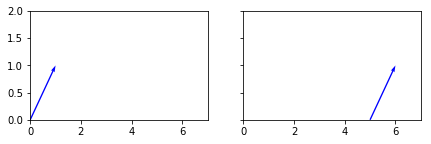

In [6]:
import matplotlib.pyplot as plt
import numpy as np 


# create vector as numpy array
a = np.array([1,1])

# create figure with vector plotted at (0,0) and (5,0)
f, ((ax1,ax2)) = plt.subplots(1,2, sharex = True, sharey=True)
f.set_size_inches((7,2))

#set x and y axis limits for subplots
plt.xlim((0,7))
plt.ylim((0,2))

#plot the vector at (0,0) and (5,0)
ax1.quiver([0],[0], a[0],a[1], color = 'b', angles='xy', scale_units='xy', scale=1)
ax2.quiver([5],[0], a[0],a[1], color = 'b', angles='xy', scale_units='xy', scale=1)
plt.show()


For trajectories of objects it is customary to choose the tail of a vector to remain fixed and for the head of the arrow to point to the location of the object in our coordinate system for a given point in time.  Therefore, we can define a time dependent vector $ \left[ {\begin{array}{cc}
   x(t)  \\
   y(t)  \\
  \end{array} } \right]$ which tracks the $x$ position, $x(t)$, and $y$ position, $y(t)$, of our object in time and has its tail at the origin.  As an example, we show how this vector changes in time and points to an object that is moving in a sinusoidal trajectory.For this system the parametric equation 
  
  ${\bf{g}}(t) =  \left[ {\begin{array}{cc}
   x(t)  \\
   y(t)  \\
  \end{array} } \right]=\left[ {\begin{array}{cc}
   t  \\
   sin(t)  \\
  \end{array} } \right]$
  
  The trajectory is given below, and the animation tracks the position of the object along the trajectory as time evolves.  You can imagine that this is the trajectory of some kind of bug running from side to side (y-direction) and forward (x-direction) on a desk as you try to squash it.  

In [25]:
from matplotlib import animation, rc
import matplotlib.pyplot as plt
import numpy as np 
from IPython.display import HTML, Image

# define a function that tracks the y position as a function of time
def y(t):
    return np.sin(t)

# define a function that tracks the x position as a function of time 
def x(t):
    return t

# create figure and axes object
fig, ax = plt.subplots(1,1)

# create a quiver object which we will later use to draw our vectors with 
Q= ax.quiver([0],[0],color='b',angles='xy', scale_units='xy', scale=1)

# create a text object which we will later use to denote the time
R = ax.text(5,1,'')


ax.set_xlim(-1, 11)
ax.set_ylim(-1.25,1.25)
plt.xlabel('x(t)')
plt.ylabel('y(t)')
t = np.linspace(0,10, 1000)
ax.plot(t, y(t))

def init():
    # define a function that tracks the y position as a function of time
    Q.set_UVC([],[])
    R.set_text('')
    return Q,  R, 

def animate(i):

    Q.set_UVC([x(i/10.0)],[y(i/10.0)])
    #ax.quiver([x(i/10.0)],[y(i/10.0)],color='b',angles='xy', scale_units='xy', scale=1)
    R.set_text('t = '+str(i/10.0))
    return Q, R,
    
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=True)
rc('animation', html='html5')
anim


Derivatives of parametric functions behave somewhat similarly to typical derivatives.  Recall that the definition of a derivative for one variable is given by

$f'(t)=\lim_{\Delta t \to 0 } \frac{f(t+\Delta t) -f(t)}{\Delta t}$, 

and evaluating the derivative at a given point results in the slope of the tangent line to the curve at that point.



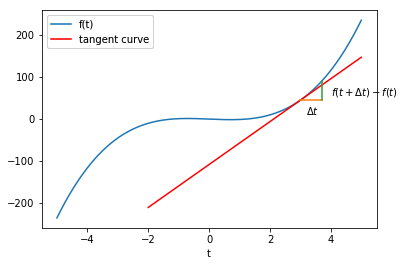

In [76]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1,1)

t = np.linspace(-5,5, 1000)

def f(t):
    return 2*t**3-3*t-1

# array of points to evaluate tangent line on 
x = np.linspace(-2,5, 200)

# line tangent to curve at 
def g(x):
    return 51*x -109

    

curve1, = ax.plot(t, f(t), label = r'f(t)')
curve2, =ax.plot(x, g(x), color= 'r', label = 'tangent curve')
ax.plot([3, 3.7],[44,44])
ax.plot([3.7, 3.7],[44,89.2])
ax.set_xlabel('t')
ax.text(4, 55, r'$f(t+\Delta t)-f(t)$')
ax.text(3.2, 10, r'$\Delta t$')

# Create a legend for the first line.
first_legend = plt.legend(handles=[curve1, curve2], loc=2)
# Add the legend manually to the current Axes.
plt.gca().add_artist(first_legend)

plt.show()


What is the geometric interpretation the derivative of a parametric equation? The definition is similar to the derivative for a one variable function.  

${\bf{f}}(t) =  \left[ {\begin{array}{cc}
   x(t)  \\
   y(t)  \\
  \end{array} } \right]$
  
$\lim_{\Delta t \to 0 } \frac{{\bf{f}}(t+\Delta t) -{\bf{f}}(t)}{\Delta t}=\lim_{\Delta t \to 0 }\frac{\left[ {\begin{array}{cc}
   x(t+\Delta t)  \\
   y(t +\Delta t)  \\
  \end{array} } \right]-\left[ {\begin{array}{cc}
   x(t)  \\
   y(t)  \\
  \end{array} } \right] }{\Delta t}$, 

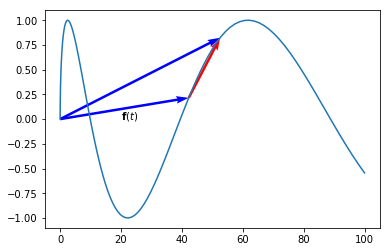

In [87]:
# define a function that tracks the y position as a function of time
def y(t):
    return np.sin(t)

# define a function that tracks the x position as a function of time 
def x(t):
    return t**2

t = np.linspace(0,10, 100)
fig, ax = plt.subplots(1,1)
ax.plot(x(t), y(t))
ax.quiver([x(6.5)],[y(6.5)],color='b',angles='xy', scale_units='xy', scale=1)
ax.quiver([x(7.25)],[y(7.25)],color='b',angles='xy', scale_units='xy', scale=1)
ax.quiver([x(6.5)], [y(6.5)],[x(7.25)-x(6.5)], [y(7.25)-y(6.5)], color='r',angles='xy', scale_units='xy', scale=1)
ax.text(20, 0, r'${\bf{f}}(t)$')
ax.
plt.show()


In [115]:
from matplotlib import animation, rc
import matplotlib.pyplot as plt
import numpy as np 
from IPython.display import HTML, Image

# define a function that tracks the y position as a function of time
def y(t):
    return np.sin(t)

# define a function that tracks the x position as a function of time 
def x(t):
    return t**2


def vy(t):
    return np.cos(t)

def vx(t):
    return 2*t
# create figure and axes object
fig, ax = plt.subplots(1,1)

# create a quiver object which we will later use to draw our vectors with 
Q= ax.quiver([0],[0],color='b',angles='xy', scale_units='xy', scale=1)
Q1= ax.quiver([0],[0],color='r',angles='xy', scale_units='xy', scale=1)
# create a text object which we will later use to denote the time
R = ax.text(20,1,'')

ax.set_xlim(-1, 101)
ax.set_ylim(-1.25,1.25)


#plt.xlabel('x(t)')
#plt.ylabel('y(t)')
t = np.linspace(0,10, 1000)
ax.plot(t**2, y(t))

def init():

    # define a function that tracks the y position as a function of time
    Q.set_UVC([],[])
    Q1.set_UVC([],[])

    R.set_text('')
    return Q, Q1, R,

def animate(i):
    ax.clear()
    ax.set_xlim(-1, 101)
    ax.set_ylim(-1.25,1.25)


#plt.xlabel('x(t)')
#plt.ylabel('y(t)')
    t = np.linspace(0,10, 1000)
    ax.plot(t**2, y(t))
    Q= ax.quiver([x(i/10.0)],[y(i/10.0)],color='b',angles='xy', scale_units='xy', scale=1)
    Q1= ax.quiver([x(i/10.0)],[y(i/10.0)],[vx(i/10.0)],[vy(i/10.0)],color='r',angles='xy', scale_units='xy', scale=1)
    R.set_text('t = '+str(i/10.0))
    return Q, Q1, R,
    
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=True)
rc('animation', html='html5')
anim
